### Création du point d’entrée sur le serveur de calcul

In [2]:
from pyspark.sql import SparkSession
spark  = SparkSession.builder.master("local[4]").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/21 14:04:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Création des différents schémas

Pas forcement utile dans notre cas étant donné que les datasets ne sont pas très grands.

L'utilisation de `inferSchema=true` aurait suffit mais risque de prends plus de temps et n'est pas forcément fiable

In [3]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, LongType

schema_caracteristiques = StructType([
    StructField("Num_Acc", LongType()),
    StructField("an", IntegerType()),
    StructField("mois", IntegerType()),
    StructField("jour", IntegerType()),
    StructField("hrmn", IntegerType()),
    StructField("lum", IntegerType()),
    StructField("agg", IntegerType()),
    StructField("int", IntegerType()),
    StructField("atm", IntegerType()),
    StructField("col", IntegerType()),
    StructField("com", IntegerType()),
    #StructField("adr", StringType()),
    StructField("gps", StringType()),
    StructField("lat", IntegerType()),
    StructField("long", IntegerType()),
    StructField("dep", IntegerType()),
])

schema_vehicules = StructType([
    StructField("Num_Acc", LongType()),
    StructField("senc", IntegerType()),
    StructField("catv", IntegerType()),
    StructField("occutc", IntegerType()),
    StructField("obs", IntegerType()),
    StructField("obsm", IntegerType()),
    StructField("choc", IntegerType()),
    StructField("manv", IntegerType()),
    StructField("num_veh", StringType()),
])

schema_usagers = StructType([
    StructField("Num_Acc", LongType()),
    StructField("place", IntegerType()),
    StructField("catu", IntegerType()),
    StructField("grav", IntegerType()),
    StructField("sexe", IntegerType()),
    StructField("trajet", IntegerType()),
    StructField("secu", StringType()),
    StructField("locp", IntegerType()),
    StructField("actp", IntegerType()),
    StructField("etatp", IntegerType()),
    StructField("an_nais", IntegerType()),
    StructField("num_veh", StringType()),
])

schema_lieux = StructType([
    StructField("Num_Acc", LongType()),
    StructField("catr", IntegerType()),
    StructField("voie", StringType()),
    StructField("v1", IntegerType()),
    StructField("v2", StringType()),
    StructField("circ", IntegerType()),
    StructField("nbv", IntegerType()),
    StructField("pr", IntegerType()),
    StructField("pr1", IntegerType()),
    StructField("vosp", IntegerType()),
    StructField("prof", IntegerType()),
    StructField("plan", IntegerType()),
    StructField("lartpc", IntegerType()),
    StructField("larrout", IntegerType()),
    StructField("surf", IntegerType()),
    StructField("infra", IntegerType()),
    StructField("situ", IntegerType()),
    StructField("env1", IntegerType()),
])

### Création des dataframes

In [4]:
# On supprime la colonne adr contenant des chaînes de caractères avec un encodage pouvant poser problème
caracteristiques = spark.read.options(header=True, delimiter=",").schema(schema_caracteristiques).csv("./accidents/carac.txt")
#caracteristiques = caracteristiques.drop('adr')

vehicules = spark.read.options(header=True, delimiter=",").schema(schema_vehicules).csv("./accidents/vehicules*.csv")

usagers = spark.read.options(header=True, delimiter=",").schema(schema_usagers).csv("./accidents/usagers*.csv")

lieux = spark.read.options(header=True, delimiter=",").schema(schema_lieux).csv("./accidents/lieux*.csv")

### Transformation des dataframes en rdd

In [5]:
caracteristiques_rdd = caracteristiques.rdd
vehicules_rdd = vehicules.rdd
usagers_rdd = usagers.rdd
lieux_rdd = lieux.rdd

### Affichages des tableaux

#### Caractéristiques

In [6]:
caracteristiques.show(truncate=False, n=5)
print(f"shape: {caracteristiques.count()} x {len(caracteristiques.columns)}")

+------------+---+----+----+----+---+---+---+---+---+---+---+-------+------+---+
|Num_Acc     |an |mois|jour|hrmn|lum|agg|int|atm|col|com|gps|lat    |long  |dep|
+------------+---+----+----+----+---+---+---+---+---+---+---+-------+------+---+
|201100000001|11 |1   |22  |1400|1  |2  |1  |1  |3  |5  |M  |5053589|295262|590|
|201100000002|11 |6   |24  |1500|1  |1  |1  |1  |3  |11 |M  |5051652|293898|590|
|201100000003|11 |9   |16  |645 |2  |2  |1  |1  |6  |52 |M  |5051080|290322|590|
|201100000004|11 |9   |22  |1515|1  |2  |1  |1  |5  |11 |M  |5051861|293043|590|
|201100000005|11 |10  |24  |1545|1  |2  |1  |1  |6  |11 |M  |5052506|293541|590|
+------------+---+----+----+----+---+---+---+---+---+---+---+-------+------+---+
only showing top 5 rows



shape: 484045 x 15


#### Véhicules

In [8]:
vehicules.show(truncate=False, n=5)

+------------+----+----+------+---+----+----+----+-------+
|Num_Acc     |senc|catv|occutc|obs|obsm|choc|manv|num_veh|
+------------+----+----+------+---+----+----+----+-------+
|201100000001|0   |2   |0     |0  |2   |1   |17  |A01    |
|201100000001|0   |7   |0     |0  |0   |6   |15  |B02    |
|201100000002|0   |10  |0     |0  |2   |2   |10  |A01    |
|201100000002|0   |33  |0     |0  |2   |1   |1   |B02    |
|201100000003|0   |7   |0     |0  |1   |3   |1   |A01    |
+------------+----+----+------+---+----+----+----+-------+
only showing top 5 rows



#### Usagers

In [25]:
usagers.show(truncate=False, n=5)
print(f"shape: {usagers.count()} x {len(usagers.columns)}")

+------------+-----+----+----+----+------+----+----+----+-----+-------+-------+
|Num_Acc     |place|catu|grav|sexe|trajet|secu|locp|actp|etatp|an_nais|num_veh|
+------------+-----+----+----+----+------+----+----+----+-----+-------+-------+
|201100000001|1    |1   |3   |1   |5     |21  |0   |0   |0    |1995   |A01    |
|201100000001|1    |1   |1   |1   |5     |11  |0   |0   |0    |1949   |B02    |
|201100000002|1    |1   |1   |1   |0     |11  |0   |0   |0    |1967   |A01    |
|201100000002|1    |1   |3   |1   |0     |21  |0   |0   |0    |1963   |B02    |
|201100000003|1    |1   |1   |1   |1     |11  |0   |0   |0    |1989   |A01    |
+------------+-----+----+----+----+------+----+----+----+-----+-------+-------+
only showing top 5 rows

shape: 1078041 x 12


#### Lieux

In [10]:
lieux.show(truncate=False, n=5)

+------------+----+----+----+----+----+---+---+---+----+----+----+------+-------+----+-----+----+----+
|Num_Acc     |catr|voie|v1  |v2  |circ|nbv|pr |pr1|vosp|prof|plan|lartpc|larrout|surf|infra|situ|env1|
+------------+----+----+----+----+----+---+---+---+----+----+----+------+-------+----+-----+----+----+
|201100000001|3   |39  |null|null|2   |2  |5  |535|0   |1   |1   |0     |60     |1   |0    |1   |0   |
|201100000002|3   |41  |null|B   |2   |0  |0  |700|0   |0   |0   |0     |0      |0   |0    |0   |0   |
|201100000003|3   |39  |null|null|2   |2  |10 |600|0   |1   |1   |0     |60     |1   |0    |1   |99  |
|201100000004|3   |39  |null|null|2   |0  |8  |400|0   |1   |1   |0     |58     |1   |0    |1   |0   |
|201100000005|3   |39  |null|null|2   |2  |7  |450|0   |1   |1   |0     |0      |1   |0    |1   |3   |
+------------+----+----+----+----+----+---+---+---+----+----+----+------+-------+----+-----+----+----+
only showing top 5 rows



### Quelques données global

#### Répartition des accidents en et hors agglomération

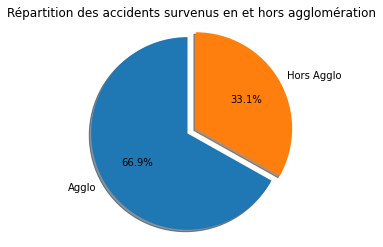

In [6]:
import matplotlib.pyplot as plt

k = caracteristiques_rdd.map(lambda x: ("Agglo" if x.agg-1 else "Hors Agglo", 1)).reduceByKey(lambda x, y: x + y).collect()

labels = k[0][0], k[1][0]
sizes = k[0][1], k[1][1]
explode = (0, 0.1)  # permet de faire ressortir la part "Autres"

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.title.set_text("Répartition des accidents survenus en et hors agglomération")

plt.show()


On observe qu'une grande majorité d'accidents à lieu en agglomération

#### Comparons les taux de mortalité des accidents en et hors agglomération

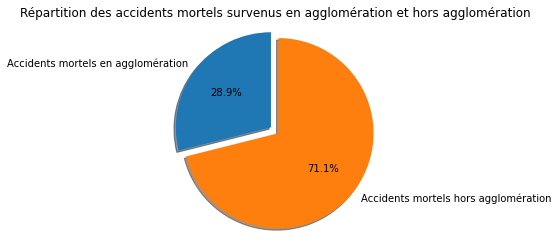

In [7]:
# comparaison des taux de mortalité entre les accidents survenus en agglomération et hors agglomération

# on ne garde que les accidents mortels
usagers_morts = usagers_rdd.filter(lambda x: x.grav == 2)

# accidents mortels en agglomération
usagers_morts_horsagglo = usagers_morts.join(caracteristiques_rdd.filter(lambda x: x.agg == 1))

# accidents mortels en agglomération
usagers_morts_agglo = usagers_morts.join(caracteristiques_rdd.filter(lambda x: x.agg == 2))


labels = "Accidents mortels en agglomération", "Accidents mortels hors agglomération"
sizes = usagers_morts_agglo.count(), usagers_morts_horsagglo.count()
explode = (0, 0.1)  # permet de faire ressortir la part 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.title.set_text("Répartition des accidents mortels survenus en agglomération et hors agglomération")

plt.show()

#### Nombre d'accidents par département trié dans l'ordre décroissant

In [9]:
# on veut afficher le top 5 des departements avec le plus d'accidents
# on commence par map pour avoir un tuple (dep, 1)
# puis reduceByKey pour compter le nombre d'accidents par departement
# ensuite sortBy pour trier les departements par ordre décroissant
# et enfin un take pour afficher les 5 premiers

caracteristiques_rdd.map(lambda x: (x.dep, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).take(5)

[(750, 51653), (130, 31405), (930, 22592), (920, 21152), (940, 20289)]

On observe que le top cinq représente essentiellement Paris, excepté pour Marseille qui se place en seconde position

[('Hors Paris', 368359), ('Paris', 115686)]


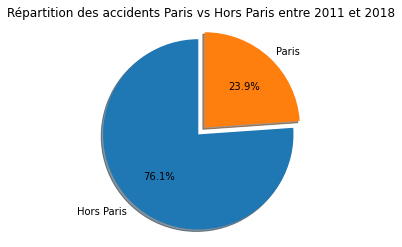

In [10]:
# on commence par map pour avoir un tuple (paris, 1) ou (hors paris, 1)
# puis reduceByKey pour compter le nombre d'accidents par departement
# enfin collect pour afficher les résultats

k = caracteristiques_rdd.map(lambda x: ("Paris" if x.dep in [750, 940, 920, 930] else "Hors Paris", 1)).reduceByKey(lambda x, y: x + y).collect()
print(k)

labels = k[0][0], k[1][0]
sizes = k[0][1], k[1][1]
explode = (0, 0.1)  # permet de faire ressortir la part "Autres"

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.title.set_text("Répartition des accidents Paris vs Hors Paris entre 2011 et 2018")

plt.show()

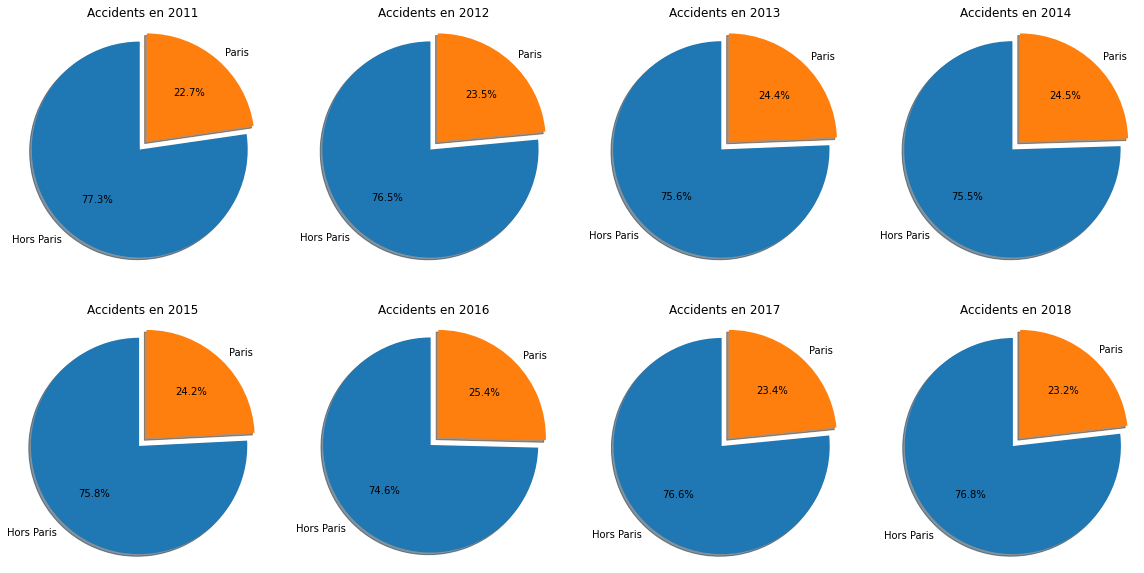

In [11]:
# create a subplot with 2 rows and 4 columns
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# on plot un camembert du nombre d'accidents à Paris et hors Paris pour chaque année entre 2011 et 2018
for i in range(11, 19):
    k = caracteristiques_rdd.filter(lambda x: x.an == i).map(lambda x: ("Paris" if x.dep in [750, 930, 940, 920] else "Hors Paris", 1)).reduceByKey(lambda x, y: x + y).collect()
    labels = k[0][0], k[1][0]
    sizes = k[0][1], k[1][1]
    explode = (0, 0.1)  # permet de faire ressortir la part "Autres"
    ax[int((i-11)/4)][(i-11)%4].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax[int((i-11)/4)][(i-11)%4].axis('equal')
    ax[int((i-11)/4)][(i-11)%4].set_title(f"Accidents en {i+2000}")
    

#### Affichons le nombre d'accidents ayant eu lieu au Rond-Point des Champs-Élysées entre 2011 et 2018

In [12]:
lat_min, lat_max, long_min, long_max  = 4886809, 4886971, 230856, 231103
rond_point_marceldassault = caracteristiques_rdd.filter(lambda x: x.lat != None and x.long != None).filter(lambda x: lat_min <= x.lat <= lat_max and long_min <= x.long <= long_max).count() #175k accidents sans coordonnées GPS

lat_min, lat_max, long_min, long_max  = 4887284, 4887300, 229537, 229819
rond_point_arctriomphe= caracteristiques_rdd.filter(lambda x: x.lat != None and x.long != None).filter(lambda x: lat_min <= x.lat <= lat_max and long_min <= x.long <= long_max).count() # 1 accident

print(f"Nombre d'accidents sur le rond point Marcel Dassault : {rond_point_marceldassault}")
print(f"Nombre d'accidents sur le rond point de l'Arc de Triomphe : {rond_point_arctriomphe}")

Nombre d'accidents sur le rond point Marcel Dassault : 34
Nombre d'accidents sur le rond point de l'Arc de Triomphe : 1


#### Nombre d'accidents par type d'intersection

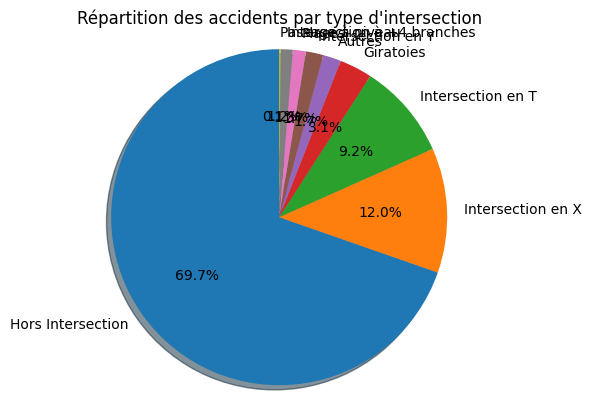

In [17]:
mapping = {1: "Hors Intersection", 2: "Intersection en X", 3: "Intersection en T", 4: "Intersection en Y", 5: "Intersection à +4 branches", 6: "Giratoies", 7: "Places", 8: "Passage à niveau", 9: "Autres"}
k = caracteristiques_rdd.map(lambda x: (mapping.get(x.int, "Autres"), 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).collect()
labels = [x[0] for x in k]
sizes = [x[1] for x in k]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.title.set_text("Répartition des accidents par type d'intersection")

plt.show()

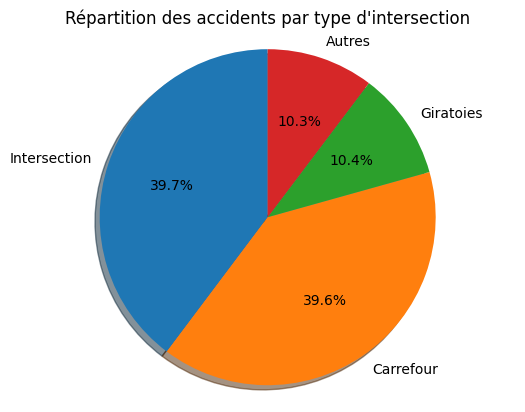

In [18]:
# on va maintenant rassembler les types d'intersection en 3 catégories : Intersection, Giratoire et Autres
# on commence par créer un dictionnaire pour faire le mapping
# puis on map pour remplacer les types d'intersection par les catégories
# ensuite on fait un reduceByKey pour compter le nombre d'accidents par catégorie

mapping = {2: "Carrefour", 3: "Intersection", 4: "Intersection", 5: "Intersection", 6: "Giratoies", 7: "Autres", 8: "Autres", 9: "Autres"}
k = caracteristiques_rdd.filter(lambda x: x.int != 1).map(lambda x: (mapping.get(x.int, "Autres"), 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).collect()
labels = [x[0] for x in k]
sizes = [x[1] for x in k]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.title.set_text("Répartition des accidents par type d'intersection")

plt.show()

On observe qu'un accident sur deux intervient en rond-point ou en carrefour, surement dû à un refus de priorité

## Des informations pertinentes ?

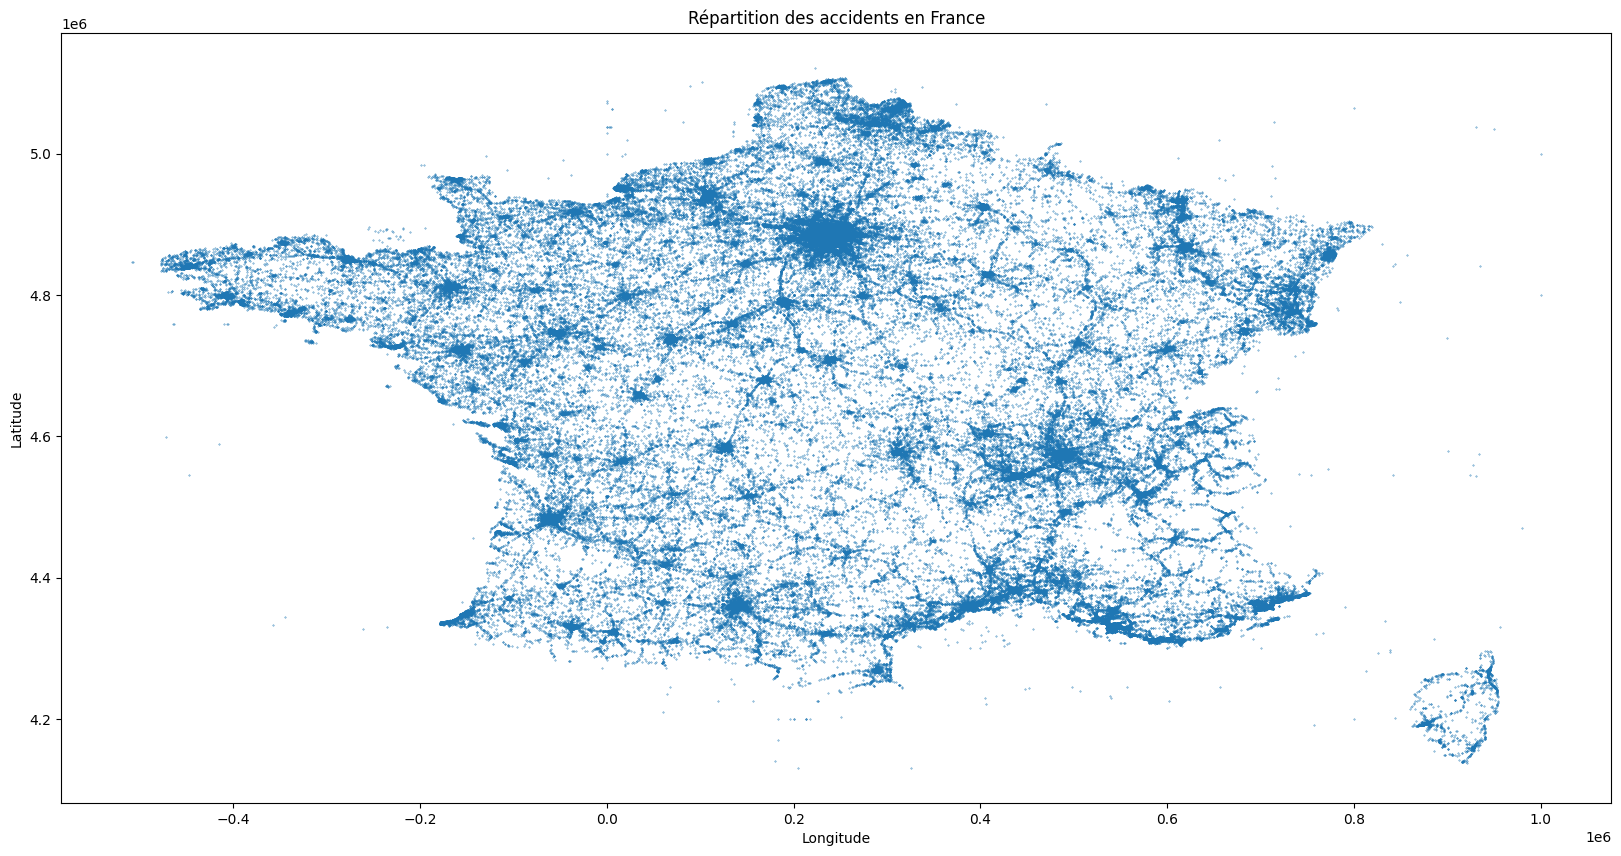

In [28]:
# scatter plot la longitude et la latitude

fig, ax = plt.subplots(figsize=(20, 10))
k = caracteristiques_rdd.filter(lambda x: x.long != None and x.long <= 1.5*10e5).filter(lambda x: x.lat != None and 3*10e5 <= x.lat <= 5.3*10e5)
ax.scatter(k.map(lambda x: x.long).collect(), k.map(lambda x: x.lat).collect(), s=0.1)
ax.set_title("Répartition des accidents en France")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

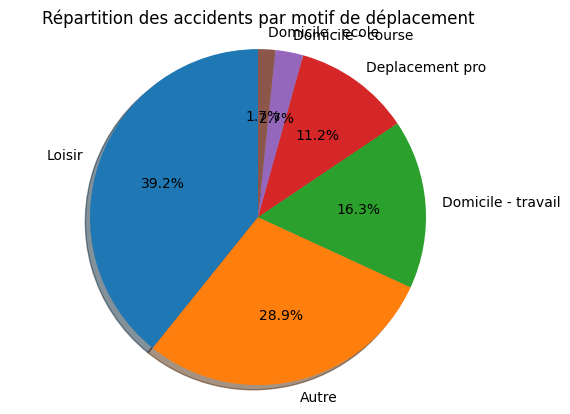

In [13]:
# nombre d'accident suivant le motif de deplacement
usagers_rdd_dropdup = usagers.dropDuplicates(["Num_Acc"]).rdd

mappings = {1: "Domicile - travail", 2: "Domicile - ecole", 3:"Domicile - course", 4:"Deplacement pro", 5:"Loisir", 9:"Autre", 0:"Autre"}


k = usagers_rdd_dropdup.filter(lambda x: x.trajet != None).map(lambda x: (mappings.get(x.trajet) or x.trajet, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).collect()

#plot a chart with the number of accident by type of movement
labels = [x[0] for x in k]
sizes = [x[1] for x in k]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.title.set_text("Répartition des accidents par motif de déplacement")
plt.show()


In [17]:
# nombre d'accident suivant le motif de deplacement
usagers_rdd_dropdup = usagers.dropDuplicates(["Num_Acc"]).rdd

# on ne garde que les trajet domicile - travail
k = usagers_rdd_dropdup.filter(lambda x: x.trajet != None and x.trajet == 1)

k = k.map(lambda x: (x.sexe, 1)).reduceByKey(lambda x, y: x + y).collect()
print(k)

[(1, 55598), (2, 23249)]


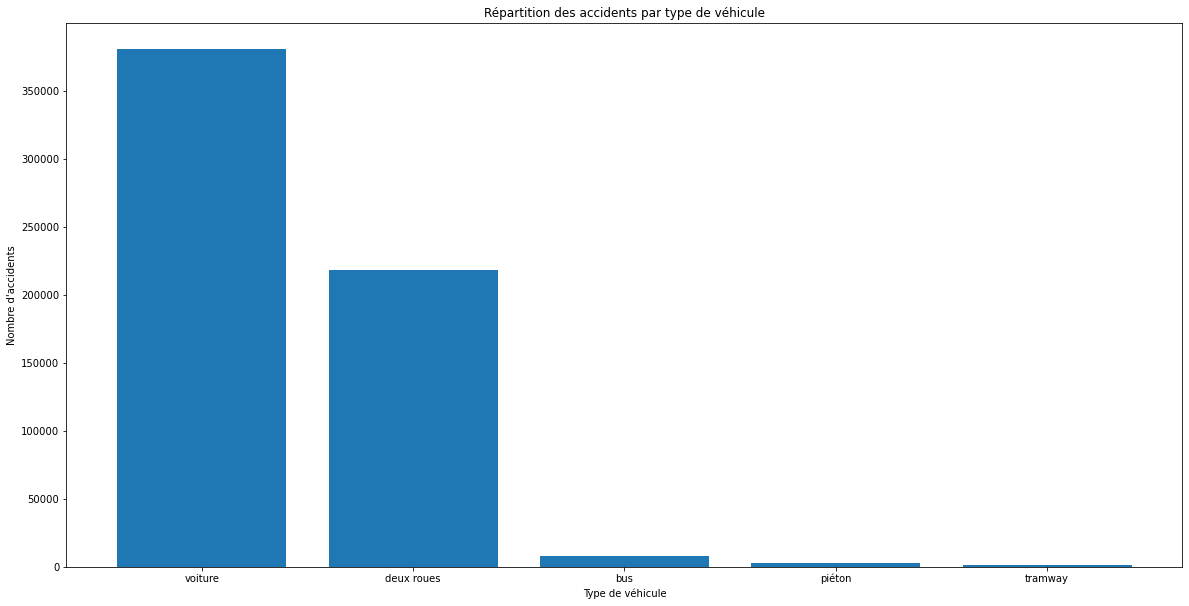

In [15]:
# accident
vehicules_rdd_dropdup = vehicules.dropDuplicates(["Num_Acc", "catv"]).drop().rdd

mappings = {1: "deux roues", 2: "deux roues", 4:"deux roues", 5:"deux roues", 6:"deux roues", 7: "voiture", 30:"deux roues", 31:"deux roues", 32:"deux roues", 33:"deux roues", 34:"deux roues", 18: "bus", 37: "bus", 38: "bus", 19:"tramway", 40:"tramway", 99: "piéton"}

# barplot du nombre d'accident par type de véhicule
k = vehicules_rdd_dropdup.filter(lambda x: x.catv != None).map(lambda x: (mappings.get(x.catv, "autres"), 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).filter(lambda x: x[0] != "autres").collect()

# barplot
labels = [x[0] for x in k]
sizes = [x[1] for x in k]

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(labels, sizes)
ax.set_title("Répartition des accidents par type de véhicule")
ax.set_xlabel("Type de véhicule")
ax.set_ylabel("Nombre d'accidents")
plt.show()


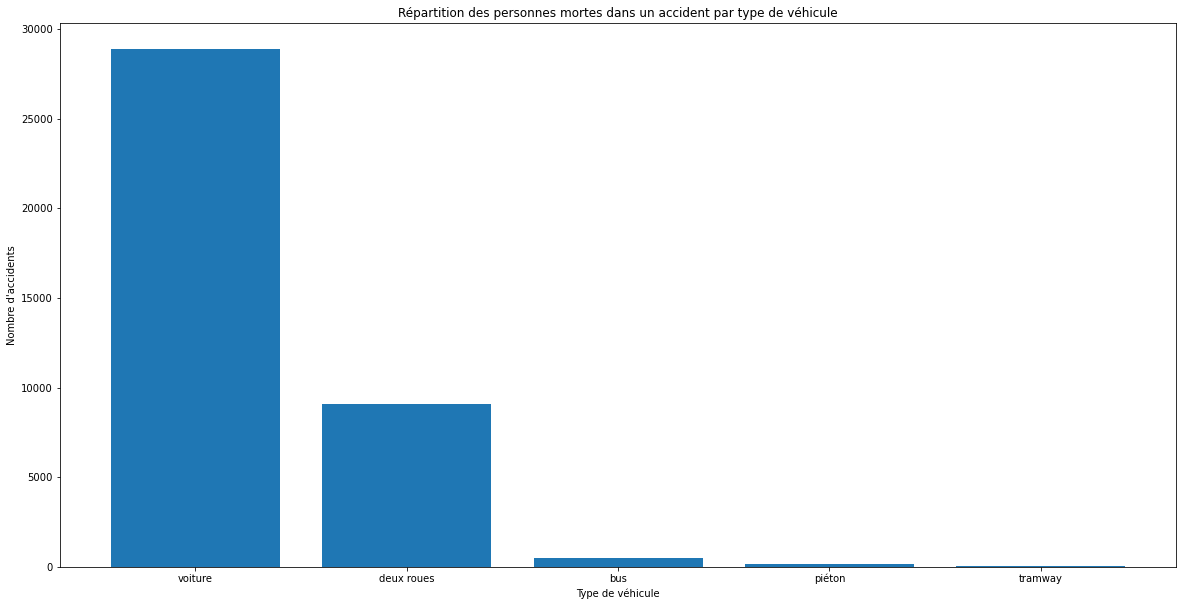

In [42]:
#piechar taux d'accident mortel par type de véhicule

usagers_dropna = usagers.dropna(subset=["grav"])

#filter the data to keep only the accident with a death
usagers_dropna = usagers_dropna.filter(usagers_dropna.grav == 2)

#join the data with the vehicules data to keep only the vehicule type
usagers_dropna = usagers_dropna.join(vehicules, usagers_dropna.Num_Acc == vehicules.Num_Acc, "inner")


mappings = {1: "deux roues", 2: "deux roues", 4:"deux roues", 5:"deux roues", 6:"deux roues", 7: "voiture", 30:"deux roues", 31:"deux roues", 32:"deux roues", 33:"deux roues", 34:"deux roues", 18: "bus", 37: "bus", 38: "bus", 19:"tramway", 40:"tramway", 99: "piéton"}

# transform to rdd and keep only the vehicule type
usagers_mort_typev = usagers_dropna.rdd.filter(lambda x: x.catv != None).map(lambda x: (mappings.get(x.catv, "autres"), 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).filter(lambda x: x[0] != "autres").collect()

# barplot
labels = [x[0] for x in usagers_mort_typev]
sizes = [x[1] for x in usagers_mort_typev]

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(labels, sizes)
ax.set_title("Répartition des personnes mortes dans un accident par type de véhicule")
ax.set_xlabel("Type de véhicule")
ax.set_ylabel("Nombre d'accidents")
plt.show()

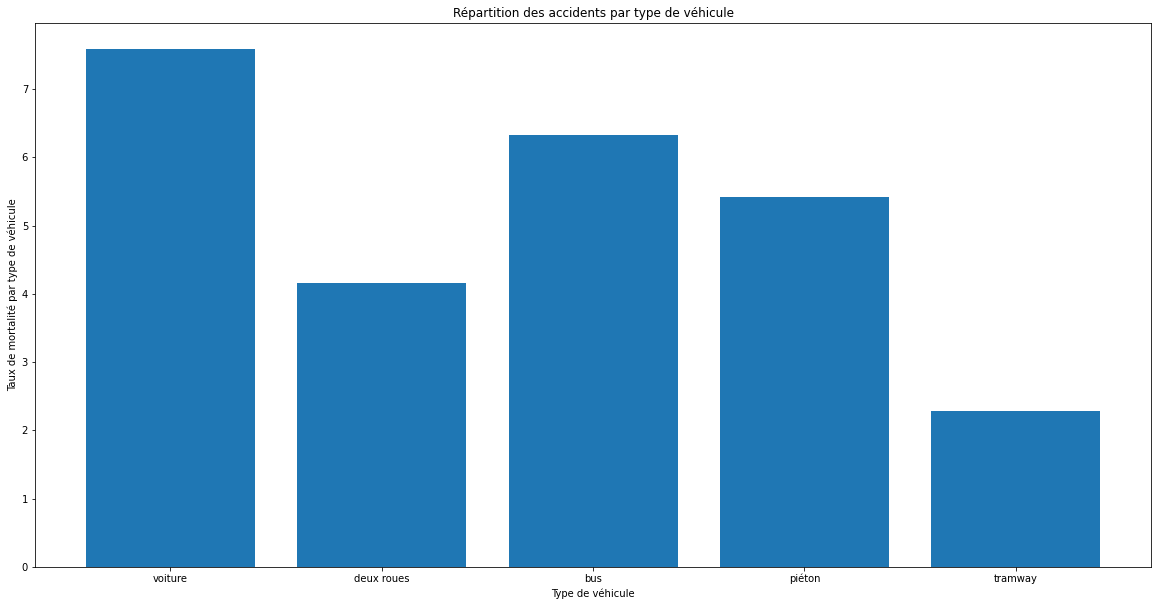

In [43]:
# normalisation des taux de mort suivant le nombre d'accident par type de véhicule
# barplot

# divide item in usagers_mort_typev by item in k
k2 = [(x[0], 100* (x[1]/y[1])) for x, y in zip(usagers_mort_typev, k)]
labels = [x[0] for x in k2]
sizes = [x[1] for x in k2]

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(labels, sizes)
ax.set_title("Répartition des Taux de mortalité par type de véhicule")
ax.set_xlabel("Type de véhicule")
ax.set_ylabel("Taux de mortalité")
plt.show()




Exception in thread "serve RDD 42" java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:708)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:752)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:675)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:641)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:617)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:574)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:532)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:64)


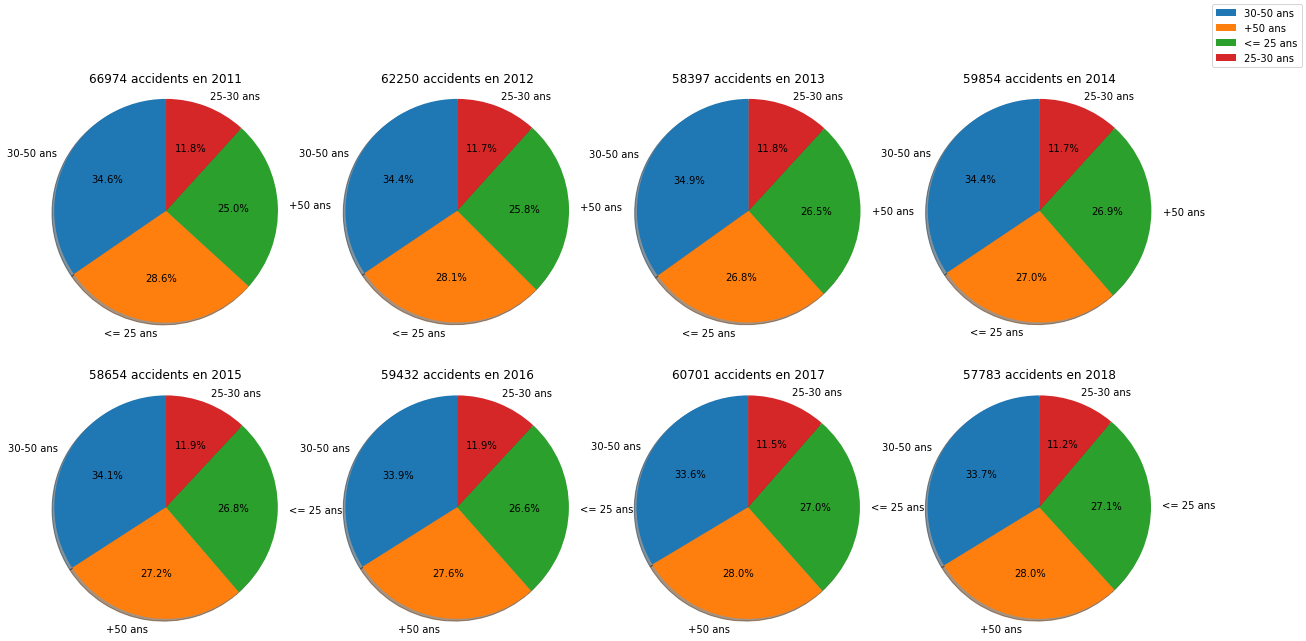

In [8]:
# graphique repartition des accidents par age pour chaque année
# create a subplot with 2 rows and 4 columns
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# plot le top3 des années de naissance des conducteurs par année dans un barplot
for i in range(11, 19):
    #acc_per_year = usagers_rdd.filter(lambda x: str(x.Num_Acc)[:4] == str(i+2000)).groupBy(lambda x: x.Num_Acc).distinct().count()
    acc_per_year = caracteristiques_rdd.filter(lambda x: x.an == i).count()

    k = usagers_rdd.filter(lambda x: x.an_nais != None).filter(lambda x: str(x.Num_Acc)[:4] == str(i+2000)).map(lambda x: (i+2000 - x.an_nais, 1)).map(lambda x: ("<= 25 ans" if x[0] < 25 else "25-30 ans" if 25 <= x[0] < 30 else "30-50 ans" if 30 <= x[0] < 50 else '+50 ans', 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).collect()

    labels = [x[0] for x in k]
    sizes = [x[1] for x in k]
    ax[int((i-11)/4)][(i-11)%4].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax[int((i-11)/4)][(i-11)%4].axis('equal')
    ax[int((i-11)/4)][(i-11)%4].set_title(f"{acc_per_year} accidents en {i+2000}")

fig.legend(labels, loc="upper right")

